# Aufgaben Blatt 4 KI Machine Learning I



## Aufgabe 1 (Lineare Regression)

Bearbeiten Sie die Aufgabe https://github.com/oduerr/ki/blob/main/linear_regression/lr_gradient_descent.ipynb

Versuchen Sie den Code zu verstehen und machen die kleineren Aufgaben, die in dem notebook besprochen werden.

## Aufgabe 2 (Titanic)
In dieser Aufgabe nehmen Sie an der Titanic Challenge (https://www.kaggle.com/c/titanic) teil. Sie können die Aufgabe am eigenen PC lösen oder direkt in Kaggle lösen. Die Daten liegen auch auf Moodle. 

a) Lesen Sie die Trainingsdaten ein und teilen Sie sie in ein Validierungsdatenset (20%) und in ein eigentliches Trainigsdatenset (80%) auf. Finden Sie auf dem Trainigsdatenset eine Regel für das Überleben alleine aufgrund der Klasse des Tickets (Pclass). Wenden Sie diese Regel auf die Validierungsdaten an. Wie gut ist die Genauigkeit (Anteil der korrekten Klassifikationen) auf den Validierungsdaten?  

In [120]:
# Hinweise zum Einlesen
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
train_val = pd.read_csv('titanic/train.csv')
train = train_val.sample(frac=0.8)
val = train_val.drop(train.index)

# Hinweise zum Erzeugen einer Tabelle
# ct = pd.crosstab(train_data.Pclass, train_data.Survived)
train_data_survivalrate = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)
pred = list()
pred_survived = list()
train_data_predictions = np.round(train_data_survivalrate['Survived'])
for data in train_data_survivalrate['Survived']:
    if data >= 0.5:
        pred.append(1)
    else:
        pred.append(0)
for data in val['Pclass']:
    pred_survived.append(pred[data-1])
    
# Hinweise um die Accuracy zu berechnen
from sklearn.metrics import accuracy_score
accuracy_score(val['Survived'], pred_survived)


0.6573033707865169

b) Wenden Sie die Regel aus a) auf die Testdaten an und laden Sie Ihre Lösung hoch. 

In [117]:
#############################################
# Hinweise zum rausschreiben
pred_survived #Enhält die Predictions 0 für Tod 1 für Survived
output = pd.DataFrame({'PassengerId': val.PassengerId, 'Survived': pred_survived})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


c) Logistische Regression mit Pclass

Trainieren Sie eine logistische Regression mit den Variablen 'Pclass'. Verwenden Sie die Klasse `sklearn.linear_model.LogisticRegression`. Berechnen Sie die Accuracy auf dem Validierungsset.

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
x_train = train[["Pclass"]]
y_train = train["Survived"]
x_test = val[["Pclass"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy

68.72

d) Coding / Feature engineering 

d.i) Missing Values:

Verwenden Sie nun weitere Features. Die Variable Age enthält Missing values, die Sie durch folgenden code ersetzen können (was passiert da?)

In [176]:
train_val = pd.read_csv('titanic/train.csv')
train = train_val.sample(frac=0.8)
val = train_val.drop(train.index)
val["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
model = LogisticRegression()
x_train = train[["Age"]]
y_train = train["Survived"]
x_test = val[["Age"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy

61.99

d.ii) Kategorische Variable

Verwenden Sie die Funktion `pd.get_dummies` um die Variablen 'Pclass' and 'Sex' in numerische Werte umzuwandeln. Führen Sie nun eine logistische Regression durch.

In [146]:
dummie_data = pd.get_dummies(train_val, columns=["Pclass", "Sex"], sparse=False)
train = dummie_data.sample(frac=0.8)
val = dummie_data.drop(train.index)
model = LogisticRegression()
x_train = train[["Pclass_1", "Pclass_2", "Pclass_3"]]
y_train = train["Survived"]
x_test = val[["Pclass_1", "Pclass_2", "Pclass_3"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy

67.88

In [145]:
model = LogisticRegression()
train = dummie_data.sample(frac=0.8)
val = dummie_data.drop(train.index)
x_train = train[["Sex_female", "Sex_male"]]
y_train = train["Survived"]
x_test = val[["Sex_female", "Sex_male"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy

79.94

In [163]:
model = LogisticRegression()
train = dummie_data.sample(frac=0.8)
val = dummie_data.drop(train.index)
x_train = train[["Sex_female", "Sex_male", "Pclass_1", "Pclass_2", "Pclass_3"]]
y_train = train["Survived"]
x_test = val[["Sex_female", "Sex_male", "Pclass_1", "Pclass_2", "Pclass_3"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy

78.96

e) Weitere Klassifikatoren. Neben der logistischen Regression, gibt es weitere Klassifikatoren. Der Random-Forest ist ein recht stabiler Klassifikator, was wäre die Performance von diesem Klassifikator.

In [182]:
# Hinweise zur Lösung
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
train_val = pd.read_csv('titanic/train.csv')
train = train_val.sample(frac=0.8)
val = train_val.drop(train.index)
x_train = train[["Pclass"]]
y_train = train["Survived"]
x_test = val[["Pclass"]]
model.fit(x_train, y_train)
model.predict(x_test)
accuracy = round(model.score(x_train, y_train) * 100, 2)
accuracy
#rf hat nun gleiches interface, wie die logistische Regression

68.72

f) [optional] Versuchen Sie weitere Features zu erzeugen und laden den besten Klassifikator auf Kaggle hoch. 

## Aufgabe 3 Titanic mit Neuronalen Netzen 

Hinweis: Diese Aufgabe kann erst nach der dritten Vorlesung in ML gemacht werden.

Mit den gleichen Daten, wie in der Aufgabe 2 d. Erstellen Sie ein fully connected neural network und fitten es an die Ttrainingsdaten. Verwenden Sie mindestens zwei hidden Layer. Plotten Sie den Verlauf der Loss Kurve für die Trainings- und Validierungsdaten. Optional: Laden Sie Ihre beste Lösung auf Kaggle hoch. 

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
23/23 - 0s - loss: 0.9811 - accuracy: 0.3829 - val_loss: 0.9073 - val_accuracy: 0.3764
Epoch 2/100
23/23 - 0s - loss: 0.8788 - accuracy: 0.3759 - val_loss: 0.8141 - val_accuracy: 0.3708
Epoch 3/100
23/23 - 0s - loss: 0.7877 - accuracy: 0.3703 - val_loss: 0.7363 - val_accuracy: 0.3820
Epoch 4/100
23/23 - 0s - loss: 0.7116 - accuracy: 0.4208 - val_loss: 0.6758 - val_accuracy: 0.6517
Epoch 5/100
23/23 - 0s - loss: 0.6570 - accuracy: 0.6830 - val_loss: 0.6463 - val_accuracy: 0.6180
Epoch 6/100
23/23 - 0s -

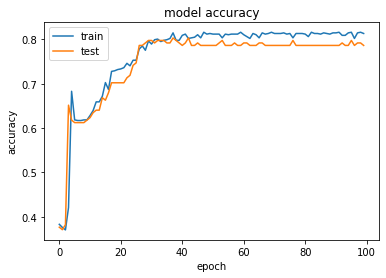

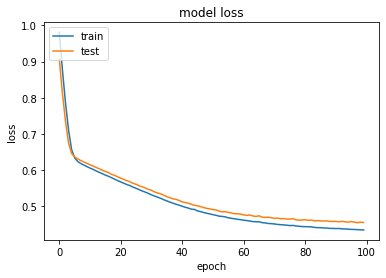

In [213]:
#Sie können von folgendem Code starten um das Netzwerk zu definieren, füllen Sie die ...
import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(10, activation='sigmoid', batch_input_shape=(None, 6))) #We have 4 input features
#...
# model.add(Dense(10, activation='sigmoid'))
# model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

train_val = pd.read_csv('titanic/train.csv')
train_val = pd.get_dummies(train_val, columns=["Pclass", "Sex"], sparse=False)
train_val["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train = train_val.sample(frac=0.8)
val = train_val.drop(train.index)

history = model.fit(train[["Pclass_1", "Pclass_2", "Pclass_3", "Sex_male", "Sex_female", "Age"]], train["Survived"],
                    batch_size=32,
                    epochs=100,
                    verbose=2,
                    validation_data=(val[["Pclass_1", "Pclass_2", "Pclass_3", "Sex_male", "Sex_female", "Age"]], val["Survived"]))
model.evaluate(train_val[["Pclass_1", "Pclass_2", "Pclass_3", "Sex_male", "Sex_female", "Age"]], train_val["Survived"])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()